# **1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **2. Load Dataset**


In [2]:
df = pd.read_csv('/content/Unemployment_in_India.csv')
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# **3. Data Cleaning**

Column names were standardized, the date column was converted to datetime format, and missing values were checked to ensure data quality.

In [4]:
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


# **4.1 Exploratory Data Analysis**
   
   Basic Statistics

In [5]:
df.describe()


,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


# **4.2 Exploratory Data Analysis**

Average Unemployment Rate by Region

In [6]:
region_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
region_avg.sort_values(ascending=False)


,Estimated Unemployment Rate (%)
Region,
Tripura,28.350357
Haryana,26.283214
Jharkhand,20.585000
Bihar,18.918214
Himachal Pradesh,18.540357
Delhi,16.495357
Jammu & Kashmir,16.188571
Chandigarh,15.991667
Rajasthan,14.058214


# **5. Unemployment Trend Over Time**

A line plot is used to represent unemployment rate trends over time.

The x-axis shows the date, and the y-axis shows the estimated unemployment rate (%).

This visualization helps identify increases and decreases in unemployment across different periods.

Sudden spikes in the graph indicate periods of economic stress, such as Covid-19 lockdowns.

Overall trends in the data help understand long-term employment conditions in India.

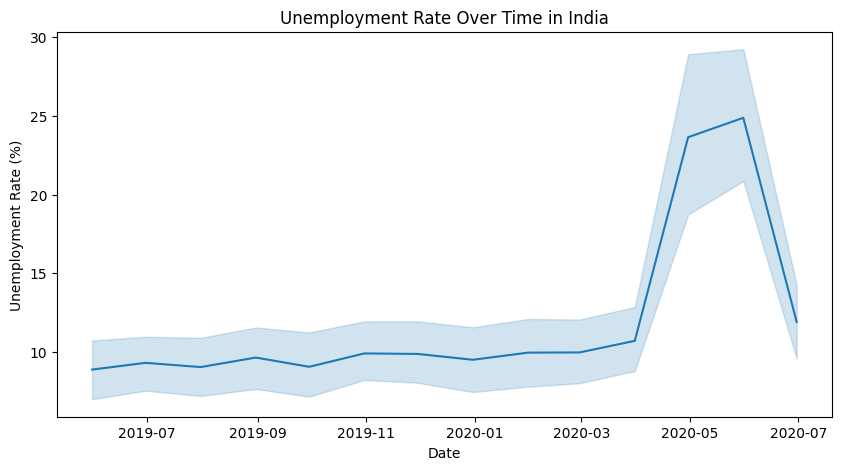

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time in India')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()


# **6. Covid-19 Impact Analysis**

Sharp spike in unemployment during lockdown period (April–May 2020).

The data is filtered to include only the Covid-19 period (March 2020 to December 2020).

A line plot is used to visualize unemployment rate changes during this period.

The graph highlights a sharp rise in unemployment due to lockdowns.

This analysis helps understand the direct impact of Covid-19 on employment.

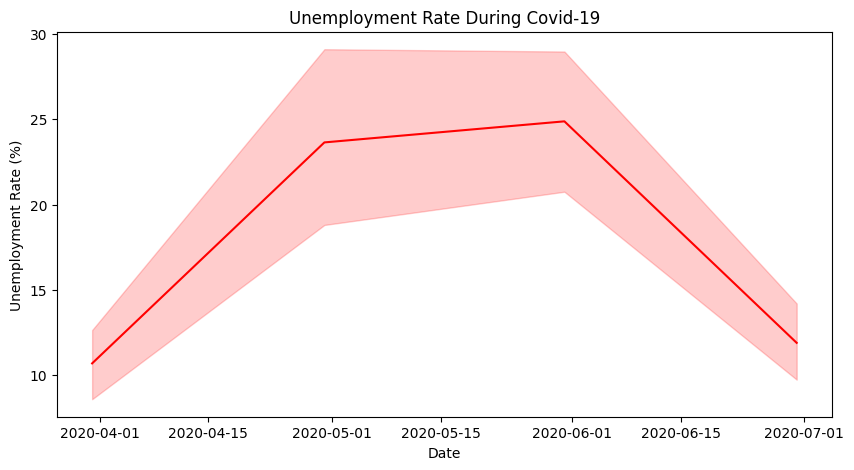

In [8]:
covid_period = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-12-31')]

plt.figure(figsize=(10,5))
sns.lineplot(data=covid_period, x='Date', y='Estimated Unemployment Rate (%)', color='red')
plt.title('Unemployment Rate During Covid-19')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()


# **7. Seasonal Trend Analysis**

Higher unemployment seen in mid-year months indicating seasonal impact.

A new column is created to extract the month from the date.

Unemployment rates are grouped by month and averaged.

A bar chart is used to compare unemployment across different months.

This helps identify seasonal patterns in unemployment rates.

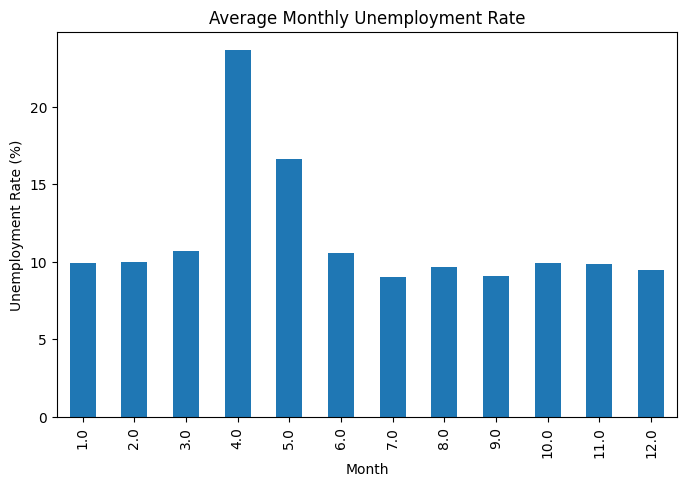

In [9]:
df['Month'] = df['Date'].dt.month

monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(8,5))
monthly_avg.plot(kind='bar')
plt.title('Average Monthly Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.show()


# **8. Region-wise Comparison**

A box plot is used to show unemployment rate distribution across regions.

Each box represents the spread, median, and variability of unemployment in a region.

Rotation of x-axis labels improves readability of region names.

This visualization helps compare regional differences and identify areas with higher unemployment variability.

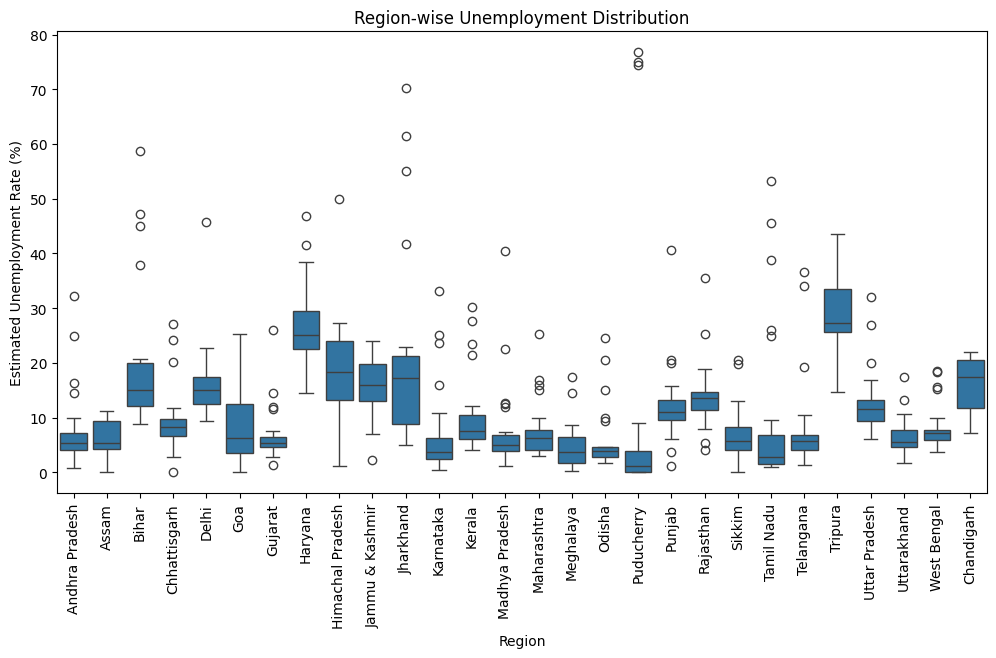

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Region', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.title('Region-wise Unemployment Distribution')
plt.show()
